In [1]:
import os
import requests

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from helpers.visualizations import set_lineplot_annotation, plot_metric_score_variation

plt.style.use('ggplot')
COLORS = sns.color_palette('colorblind')

In [2]:
if os.getenv('CONTAINER_BASE_DIR'):
    API_DIRECTORY_URL = 'http://api:8080/'
    directory = requests.get(API_DIRECTORY_URL).json()
    directory['result'] = {
        k: v.replace('localhost', 'api') 
        for k, v in directory['result'].items()}
else:
    API_DIRECTORY_URL = 'http://localhost:8080/'
    directory = requests.get(API_DIRECTORY_URL).json()

In [3]:
def get_result_by_exp_id(exp_id: str):
    df_grid_melt = df.melt(
        id_vars=['exp_id'], var_name="metrics", value_name="scores")
    
    # filter by experiment id
    df_grid_melt = df_grid_melt.loc[
        (df_grid_melt['exp_id'] == exp_id) &
        (df_grid_melt['metrics'].str.contains('mean_test_'))]
    
    # rename metric names 
    mapper = {
        'mean_test_f1': 'F-Score', 
        'mean_test_geometric_mean_score': 'G-Mean',
        'mean_test_precision': 'Precision', 
        'mean_test_recall': 'Recall', 
        'mean_test_roc_auc': 'ROC AUC',
        'mean_test_specificity': 'Specificity'}
    df_grid_melt['metrics'] = df_grid_melt['metrics'].apply(
        lambda string: mapper[string])

    # create summary table and save as csv file locally
    dff = pd.DataFrame()
    dff['min'] = df_grid_melt[['scores', 'metrics']].groupby('metrics').min()
    dff['median'] = df_grid_melt[['scores', 'metrics']].groupby('metrics').median()
    dff['mean'] = df_grid_melt[['scores', 'metrics']].groupby('metrics').mean()
    dff['std'] = df_grid_melt[['scores', 'metrics']].groupby('metrics').std()
    dff['max'] = df_grid_melt[['scores', 'metrics']].groupby('metrics').max()
    res_method, model, _ = exp_id.replace(' ', '').split('+')
    dff.to_csv(f'../../data/tables/{res_method}_{model}_metric_scores.csv')

    # plot overall metric performance
    _ = plt.figure(figsize=[8,6])
    sns.barplot(
        data=df_grid_melt, x='metrics', y='scores',
#         showmeans=True,
#         meanprops={
#             'marker':'.',
#             'markerfacecolor':'white', 
#             'markeredgecolor':'black',
#             'markersize':'10'}
    )
    plt.title('Metricas de Rendimiento de "{0}"'.format(exp_id))
    plt.xlabel('metrica')
    plt.ylabel('puntuación')
    plt.tight_layout()
    

# xytext_locs=[(-20, -5), (20, 5)])
def get_param_variation_by_exp_id(exp_id: str, param: str, xytext_locs=None):
    # filter df by experiment id and param to plot
    metrics = [
        col for col in df.columns 
        if col.startswith('mean_test_') \
        or col.startswith('mean_train_')]
    mask = ~(df[param].isnull()) & (df['exp_id'] == exp_id)
    cols = ['exp_id', param] + metrics
    df_to_plot = df.loc[mask, cols]
    
    plot_metric_score_variation(
        data=df_to_plot,
        param=param,
        colors=COLORS,
        xytext_locs=xytext_locs,
        scale_y_axis=False)

In [4]:
raw_grid_data = requests.get(
    directory['result']['get_grid_cv_results_model_data']).json()

df = pd.DataFrame()
for record in raw_grid_data['result']:
    grid_record = record['message']['data']
    df_grid = pd.DataFrame(grid_record)
    df = pd.concat([df, df_grid], ignore_index=True)

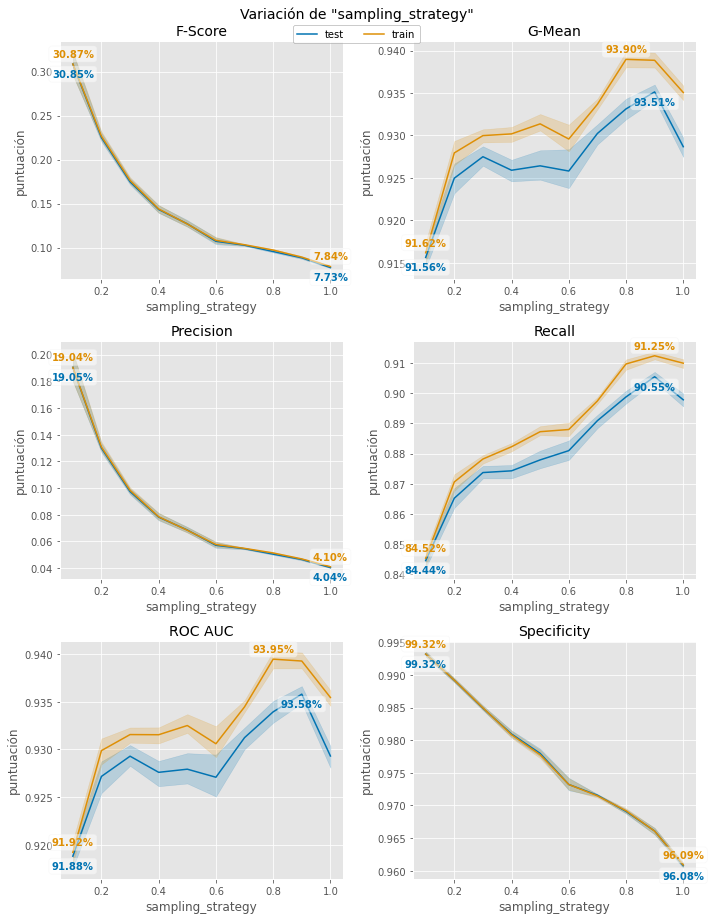

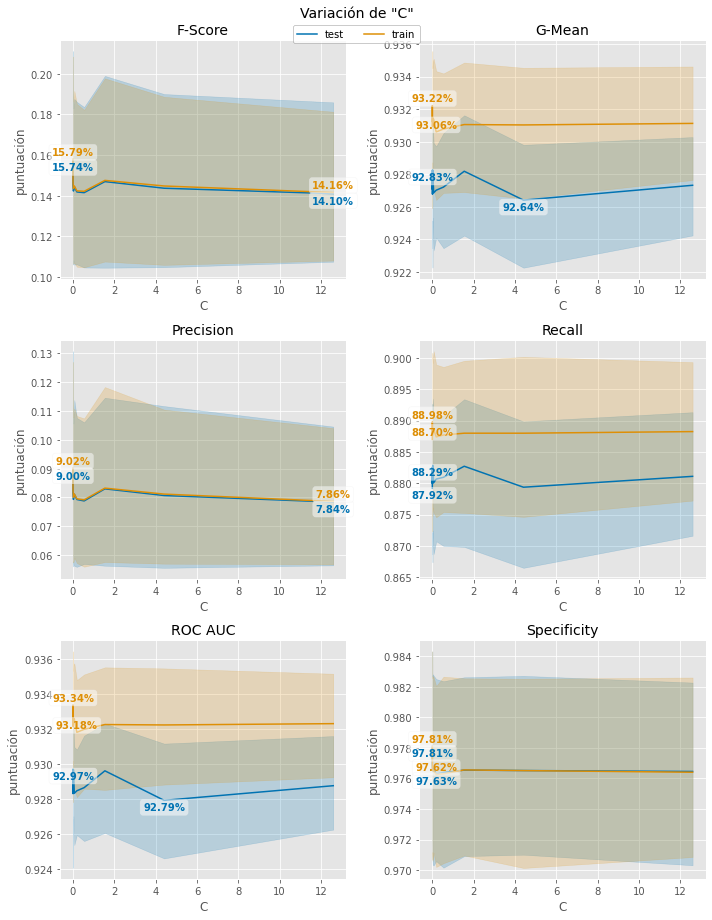

In [5]:
# ROS + LR + GSCV
get_param_variation_by_exp_id(
    'ROS + LR + GSCV', 'param_resampling__sampling_strategy', [(0, -5), (0, 5)])
get_param_variation_by_exp_id(
    'ROS + LR + GSCV', 'param_estimator__C', [(0, -2), (0, 2)])

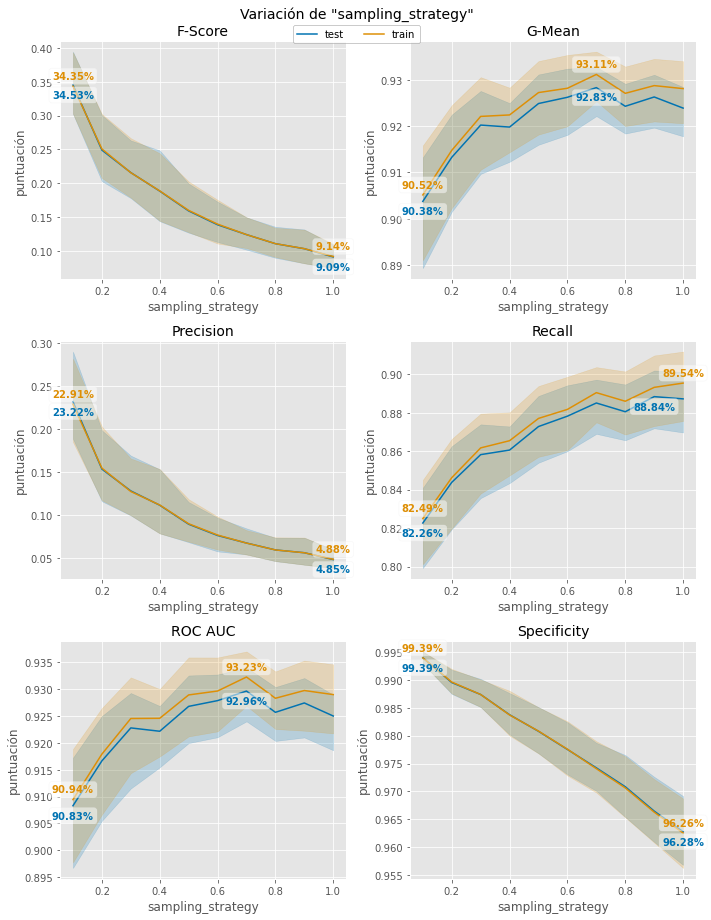

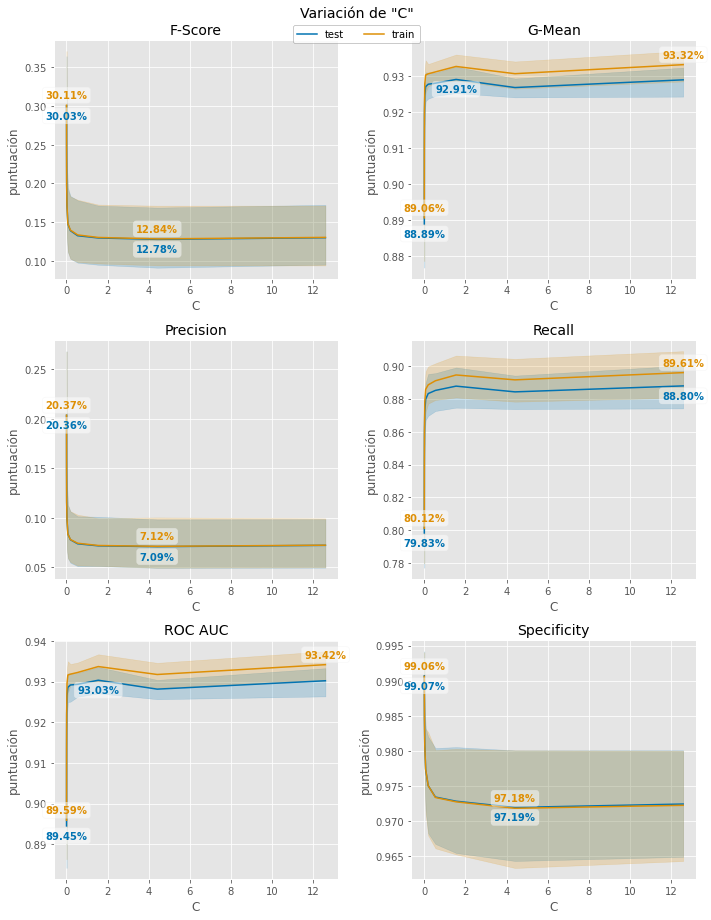

In [6]:
## RUS+LR+GSCV
get_param_variation_by_exp_id(
    'RUS + LR + GSCV', 'param_resampling__sampling_strategy', [(0, -5), (0, 5)])
get_param_variation_by_exp_id(
    'RUS + LR + GSCV', 'param_estimator__C', [(0, -5), (0, 5)])

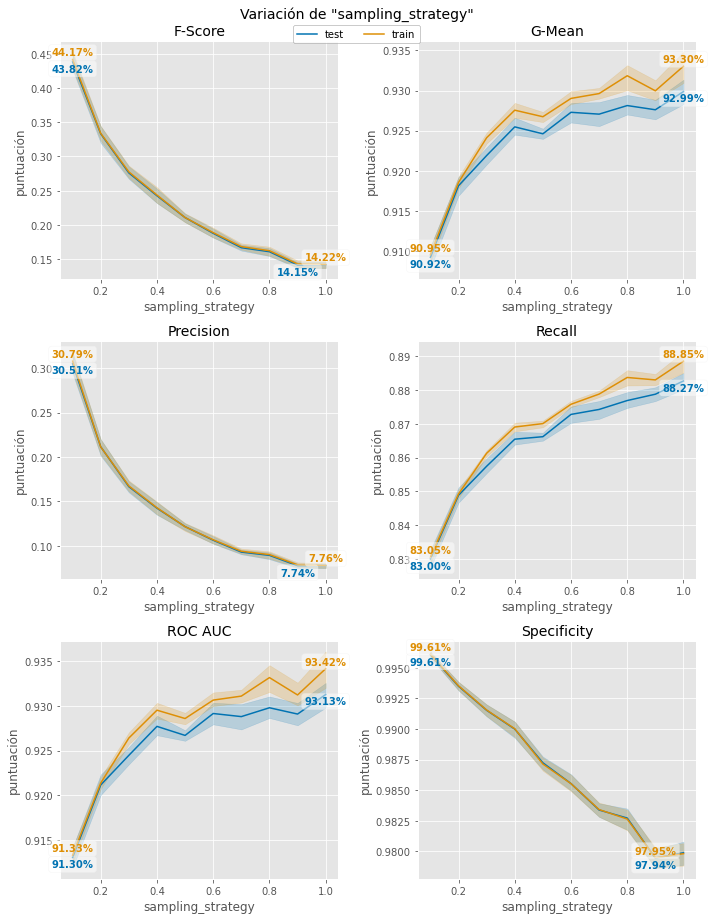

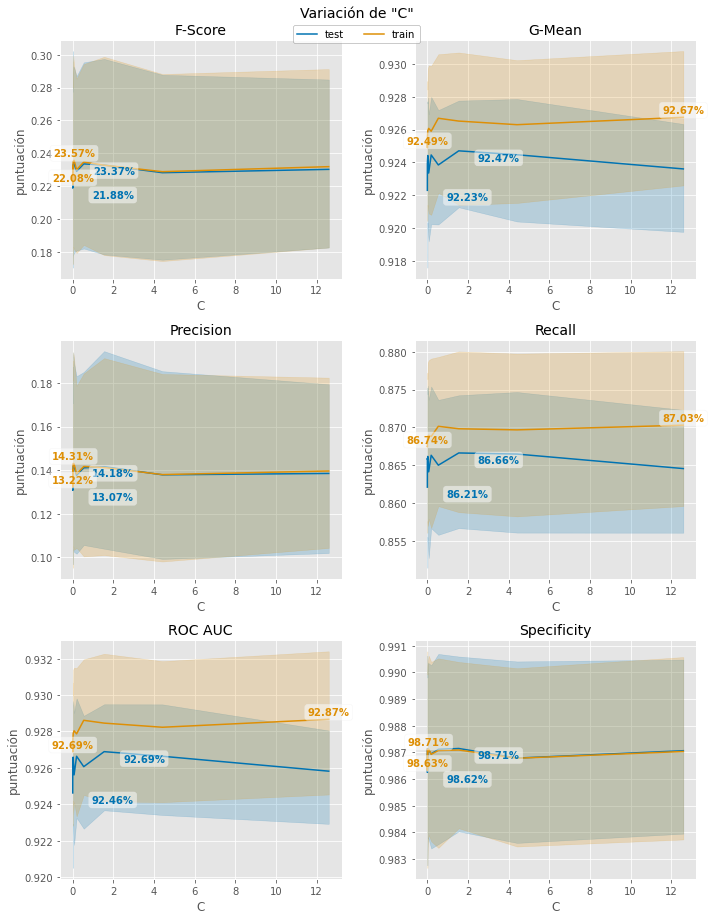

In [15]:
## SMOTE+LR+GSCV
get_param_variation_by_exp_id(
    'SMOTE + LR + GSCV', 'param_resampling__sampling_strategy', [(0, -2), (0, 2)])
get_param_variation_by_exp_id(
    'SMOTE + LR + GSCV', 'param_estimator__C', [(40, -2), (0, 2)])

In [8]:
## None+RanFor+GSCV


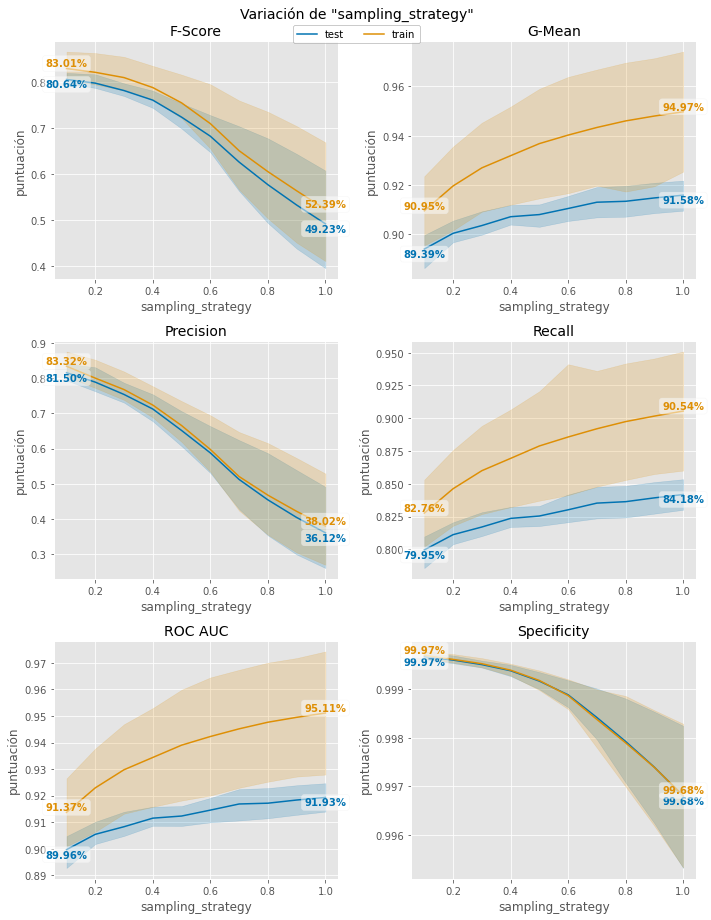

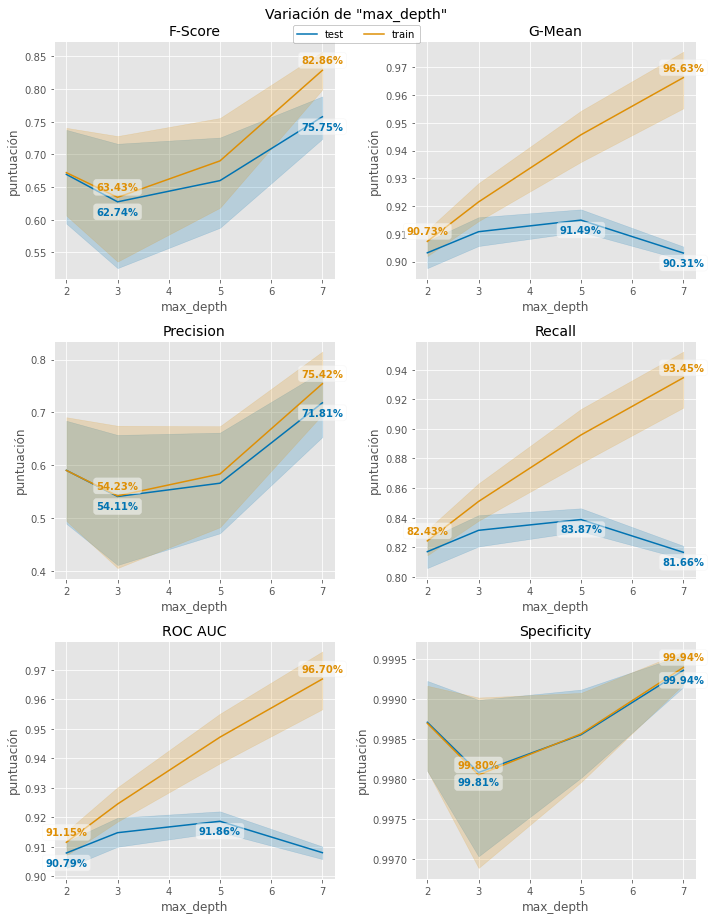

In [9]:
## ROS+RFC+GSCV
get_param_variation_by_exp_id(
    'ROS + RFC + GSCV', 'param_resampling__sampling_strategy')
get_param_variation_by_exp_id(
    'ROS + RFC + GSCV', 'param_estimator__max_depth', [(0, -5), (0, 5)])

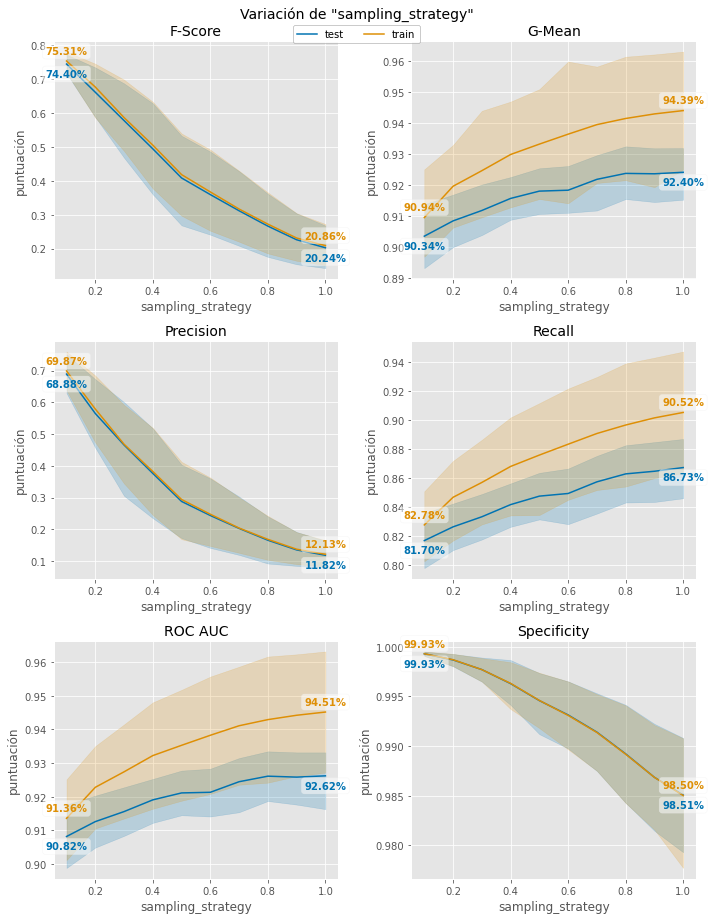

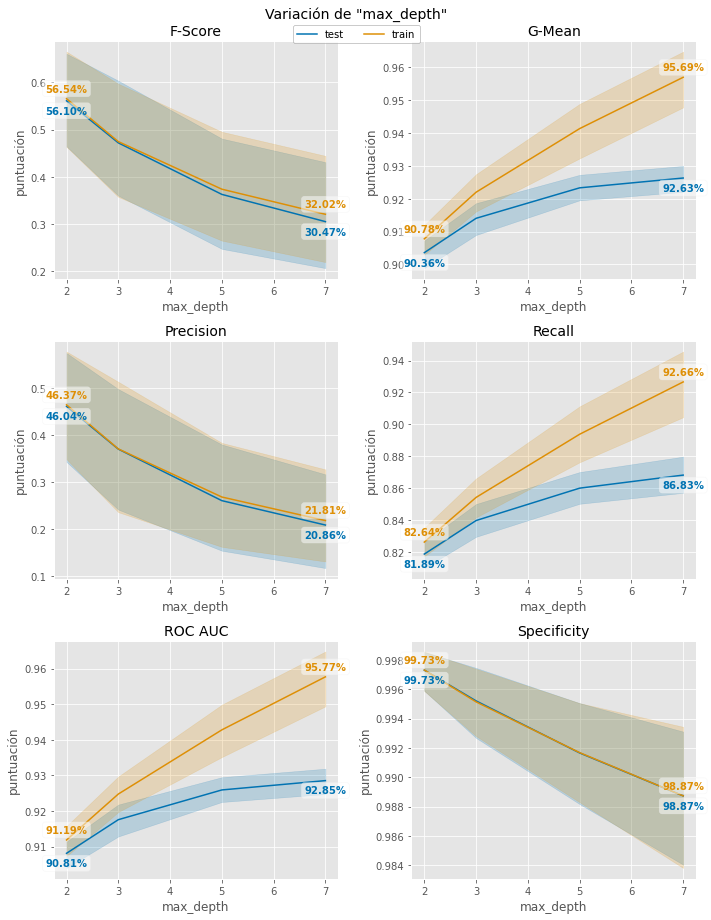

In [10]:
## RUS+RFC+GSCV
get_param_variation_by_exp_id(
    'RUS + RFC + GSCV', 'param_resampling__sampling_strategy', [(0, -5), (0, 5)])
get_param_variation_by_exp_id(
    'RUS + RFC + GSCV', 'param_estimator__max_depth', [(0, -5), (0, 5)])

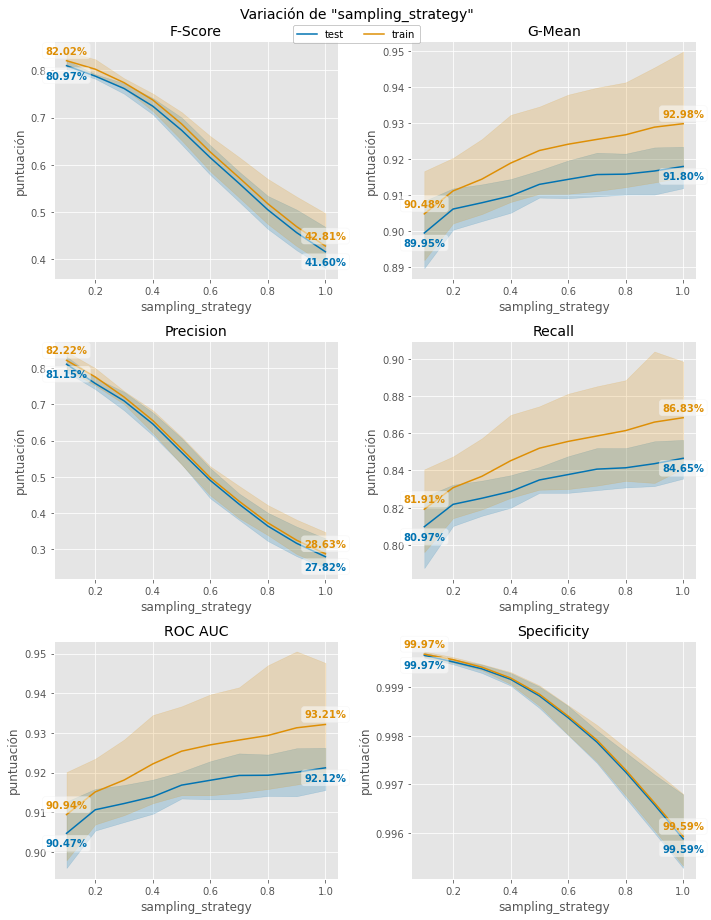

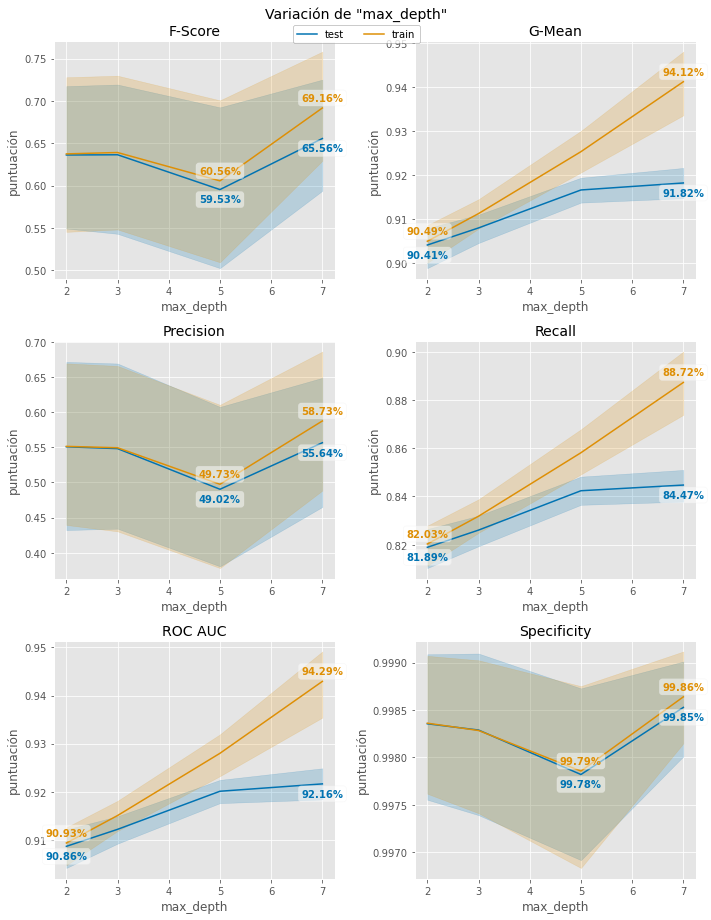

In [11]:
## SMOTE+RFC+GSCV
get_param_variation_by_exp_id(
    'SMOTE + RFC + GSCV', 'param_resampling__sampling_strategy', [(0, -5), (0, 5)])
get_param_variation_by_exp_id(
    'SMOTE + RFC + GSCV', 'param_estimator__max_depth', [(0, -5), (0, 5)])